# Example: Holdout set
----------------------

This example shows when and how to use ATOM's holdout set in an exploration pipeline.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  MelbourneAirport     18.0     26.9      21.4          7.0       8.9   
1          Adelaide     17.2     23.4       0.0          NaN       NaN   
2            Cairns     18.6     24.6       7.4          3.0       6.1   
3          Portland     13.6     16.8       4.2          1.2       0.0   
4           Walpole     16.4     19.9       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0         SSE           41.0          W        SSE  ...         95.0   
1           S           41.0          S        WSW  ...         59.0   
2         SSE           54.0        SSE         SE  ...         78.0   
3         ESE           39.0        ESE        ESE  ...         76.0   
4          SE           44.0         SE         SE  ...         78.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         54.0       1019.5       1017.0       8.0       5.0     18.5   
1         36.0       1015.7       1015.7       NaN       NaN     17.7   
2         57.0       1018.7       1016.6       3.0       3.0     20.8   
3         74.0       1021.4       1020.5       7.0       8.0     15.6   
4         70.0       1019.4       1018.9       NaN       NaN     17.4   

   Temp3pm  RainToday  RainTomorrow  
0     26.0        Yes             0  
1     21.9         No             0  
2     24.1        Yes             0  
3     16.0        Yes             1  
4     18.1         No             0  

[5 rows x 22 columns]

## Run the pipeline

In [3]:
# Initialize atom specifying a fraction of the dataset for holdout
atom = ATOMClassifier(X, n_rows=0.5, holdout_size=0.2, verbose=2)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (56877, 22)
Train set size: 42658
Test set size: 14219
Holdout set size: 14219
-------------------------------------
Memory: 10.01 MB
Scaled: False
Missing values: 127278 (10.2%)
Categorical features: 5 (23.8%)
Duplicates: 12 (0.0%)



In [4]:
# The test and holdout fractions are split after subsampling the dataset
# Also note that the holdout data set is not a part of atom's dataset
print("Length loaded data:", len(X))
print("Length dataset + holdout:", len(atom.dataset) + len(atom.holdout))

Length loaded data: 142193
Length dataset + holdout: 71096


In [5]:
atom.impute()
atom.encode()

Fitting Imputer...
Imputing missing values...
 --> Imputing 247 missing values with mean (12.2) in column MinTemp.
 --> Imputing 127 missing values with mean (23.24) in column MaxTemp.
 --> Imputing 562 missing values with mean (2.4) in column Rainfall.
 --> Imputing 24510 missing values with mean (5.45) in column Evaporation.
 --> Imputing 27337 missing values with mean (7.61) in column Sunshine.
 --> Imputing 3715 missing values with most_frequent (W) in column WindGustDir.
 --> Imputing 3697 missing values with mean (39.99) in column WindGustSpeed.
 --> Imputing 3940 missing values with most_frequent (N) in column WindDir9am.
 --> Imputing 1509 missing values with most_frequent (SE) in column WindDir3pm.
 --> Imputing 539 missing values with mean (13.99) in column WindSpeed9am.
 --> Imputing 1060 missing values with mean (18.62) in column WindSpeed3pm.
 --> Imputing 708 missing values with mean (68.95) in column Humidity9am.
 --> Imputing 1479 missing values with mean (51.56) in col

In [6]:
# Unlike train and test, the holdout data set is not transformed until used for predictions
atom.holdout

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
56877        Launceston     10.1     23.6       0.0          NaN       NaN   
56878       Tuggeranong      3.8     14.6      15.8          NaN       NaN   
56879  MelbourneAirport      7.7     19.9       0.4          3.0       4.7   
56880         GoldCoast     22.0     28.0       0.0          NaN       NaN   
56881            Sydney      8.2     19.3       3.0          0.8       9.9   
...                 ...      ...      ...       ...          ...       ...   
71091         Newcastle     16.2     30.2       0.0          NaN       NaN   
71092          Adelaide      8.9     14.5       6.4          1.6       NaN   
71093          Brisbane     19.7     26.3       2.4          7.2       2.8   
71094          Brisbane     21.5     29.5      21.6          5.8      12.1   
71095            Cairns     23.5     31.6      24.2          8.2       7.9   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
56877          NW           26.0        SSE         NW  ...         71.0   
56878          NW           57.0         NW         NW  ...         85.0   
56879           N           52.0          N          N  ...         75.0   
56880          SE           26.0         SE        ESE  ...         79.0   
56881         NNE           33.0        WNW         NE  ...         93.0   
...           ...            ...        ...        ...  ...          ...   
71091         NaN            NaN         NE         SE  ...         82.0   
71092           W           61.0          W        WSW  ...         87.0   
71093         ENE           37.0        ESE         SE  ...         64.0   
71094           E           33.0        ESE          E  ...         62.0   
71095          SE           48.0          S         SE  ...         79.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
56877         49.0       1018.6       1014.9       NaN       NaN     15.6   
56878         67.0       1008.1       1007.1       NaN       NaN     10.7   
56879         42.0       1026.9       1024.3       7.0       6.0     12.0   
56880         79.0       1014.8       1013.0       NaN       NaN     25.6   
56881         54.0       1033.1       1029.3       1.0       1.0      9.9   
...            ...          ...          ...       ...       ...      ...   
71091         45.0          NaN          NaN       2.0       6.0     19.9   
71092         84.0       1008.3       1008.7       NaN       NaN      9.9   
71093         63.0       1014.5       1013.0       7.0       7.0     25.1   
71094         48.0       1017.5       1016.4       7.0       3.0     26.9   
71095         60.0       1011.3       1008.4       7.0       7.0     25.9   

       Temp3pm  RainToday  RainTomorrow  
56877     22.6         No             0  
56878     11.5        Yes             0  
56879     18.2         No             0  
56880     26.2         No             1  
56881     18.3        Yes             0  
...        ...        ...           ...  
71091     30.0         No             0  
71092     11.4        Yes             1  
71093     25.1        Yes             1  
71094     28.5        Yes             0  
71095     30.0        Yes             1  

[14219 rows x 22 columns]

In [7]:
atom.run(models=["GNB", "LR", "RF"])


Training ========================= >>
Models: GNB, LR, RF
Metric: f1


Results for GaussianNB:
Fit ---------------------------------------------
Train evaluation --> f1: 0.5822
Test evaluation --> f1: 0.5868
Time elapsed: 0.628s
-------------------------------------------------
Time: 0.628s


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> f1: 0.5783
Test evaluation --> f1: 0.5833
Time elapsed: 1.300s
-------------------------------------------------
Time: 1.300s


Results for RandomForest:
Fit ---------------------------------------------
Train evaluation --> f1: 0.9999
Test evaluation --> f1: 0.6106
Time elapsed: 11.206s
-------------------------------------------------
Time: 11.206s


Final results ==================== >>
Total time: 14.419s
-------------------------------------
GaussianNB         --> f1: 0.5868
LogisticRegression --> f1: 0.5833
RandomForest       --> f1: 0.6106 ~ !


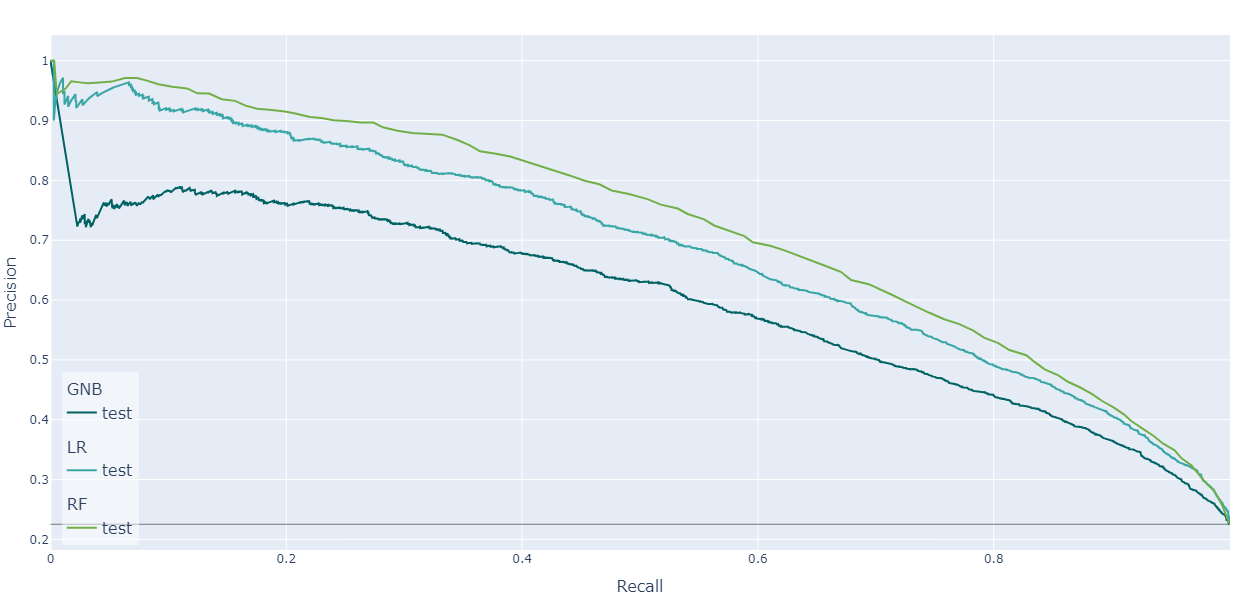

In [8]:
atom.plot_prc()

In [9]:
# Based on the results on the test set, we select the best model for further tuning
atom.run("lr_tuned", n_trials=10)


Training ========================= >>
Models: LR_tuned
Metric: f1


Running hyperparameter tuning for LogisticRegression...
| trial | penalty |       C |  solver | max_iter | l1_ratio |      f1 | best_f1 | time_trial | time_ht |    state |
| ----- | ------- | ------- | ------- | -------- | -------- | ------- | ------- | ---------- | ------- | -------- |
| 0     |      l2 | 93.3326 |   lbfgs |      120 |      0.9 |   0.565 |   0.565 |     1.089s |  1.089s | COMPLETE |
| 1     |    None | 13.0924 | newto.. |      980 |      0.7 |  0.5708 |  0.5708 |     1.047s |  2.136s | COMPLETE |
| 2     |      l2 | 64.7949 |     sag |      830 |      0.4 |  0.5713 |  0.5713 |     1.275s |  3.411s | COMPLETE |
| 3     |      l2 |  0.0178 | newto.. |      170 |      0.9 |  0.5809 |  0.5809 |     1.084s |  4.495s | COMPLETE |
| 4     | elast.. |  0.0087 |    saga |      560 |      1.0 |  0.5713 |  0.5809 |     1.489s |  5.984s | COMPLETE |
| 5     |      l2 |  4.9393 |     sag |      510 |      0.3 |  

## Analyze the results

We already used the test set to choose the best model for futher tuning, so this set is no longer truly independent. Although it may not be directly visible in the results, using the test set now to evaluate the tuned LR model would be a mistake, since it carries a bias. For this reason, we have set apart an extra, indepedent set to validate the final model: the holdout set. If we are not going to use the test set for validation, we might as well use it to train the model and so optimize the use of the available data. Use the full_train method for this.

In [10]:
# Re-train the model on the full dataset (train + test) 
atom.lr_tuned.full_train()

Fit ---------------------------------------------
Train evaluation --> f1: 0.5787
Test evaluation --> f1: 0.5844
Time elapsed: 2.542s


In [11]:
# Evaluate on the holdout set
atom.lr_tuned.evaluate(rows="holdout")

accuracy     0.8427
ap           0.6903
ba           0.7198
f1           0.5869
jaccard      0.4153
mcc          0.5066
precision    0.7184
recall       0.4961
auc          0.8648
Name: LR_tuned, dtype: float64

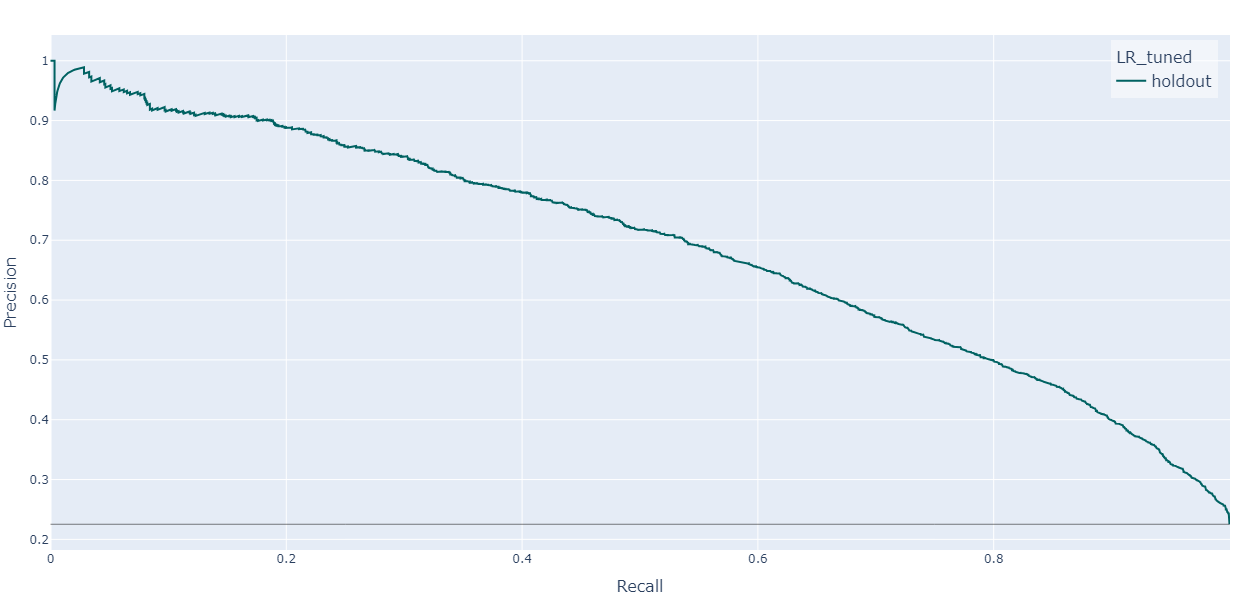

In [12]:
atom.lr_tuned.plot_prc(rows="holdout", legend="upper right")